<a href="https://colab.research.google.com/github/irfanbykara/Machine-Learning-Notebooks/blob/main/Stock_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Here are the classic data science libraries we are importing.

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline 

from pandas_datareader.data import DataReader 

from datetime import datetime 

print('Importing done.')

Importing done.


In [2]:
# Installing packages to reach Yahoo Finance Api.

!pip install yfinance
!pip install pandas --upgrade


     |████████████████████████████████| 6.4 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 11.3 MB 4.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [3]:
from pandas_datareader import data as pdr
import yfinance as yf

# Five motor companies that I wonder: Honda, Hyundai, Lucid, Tesla and Toyota
tech_list = ['HMC', 'HYMTF', 'LCID','TSLA','TM']

yf.pdr_override() 


end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    info_fetcher = yf.Ticker(stock)

    globals()[stock] = info_fetcher.history(start=start, end=end)


In [8]:
company_list = [HMC, HYMTF, LCID,TSLA,TM]
company_name = ["HONDA", "HYUNDAI", "LUCID",'TESLA','TOYOTA']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2021-03-10,700.299988,717.849976,655.059998,668.059998,60605700,0,0,TESLA
2021-07-06,681.710022,684.000000,651.400024,659.580017,23284500,0,0,TESLA
2021-03-19,47.980000,48.599998,47.259998,48.599998,1700,0,0,HYUNDAI
2021-07-08,31.469999,31.590000,31.230000,31.379999,562500,0,0,HONDA
2021-01-06,758.489990,774.000000,749.099976,755.979980,44700000,0,0,TESLA
2021-11-02,1159.359985,1208.589966,1146.000000,1172.000000,42737800,0,0,TESLA
2021-06-08,180.910004,181.000000,179.389999,179.610001,307100,0,0,TOYOTA
2021-02-10,29.990000,29.990000,29.540001,29.639999,826400,0,0,HONDA
2021-08-26,43.029999,43.029999,42.700001,43.000000,2800,0,0,HYUNDAI


In [6]:
df.shape

(1260, 8)

In [10]:
df.loc[df['company_name']=='TESLA'].describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.0,252.0
mean,767.898929,783.259198,750.951954,767.764761,2.789042e+07,0.0,0.0
std,154.416329,159.029828,149.039918,154.424085,1.244698e+07,0.0,0.0
min,552.549988,566.210022,539.489990,563.000000,9.800600e+06,0.0,0.0
25%,665.574997,678.479996,650.217484,662.062485,1.910875e+07,0.0,0.0
50%,715.359985,726.170013,704.105011,714.630005,2.535180e+07,0.0,0.0
75%,835.182495,848.500000,819.912476,840.615005,3.331870e+07,0.0,0.0
max,1234.410034,1243.489990,1217.000000,1229.910034,8.939650e+07,0.0,0.0


In [11]:
df.loc[df['company_name']=='TESLA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-12-21 to 2021-12-20
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    int64  
 6   Stock Splits  252 non-null    int64  
 7   company_name  252 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 17.7+ KB


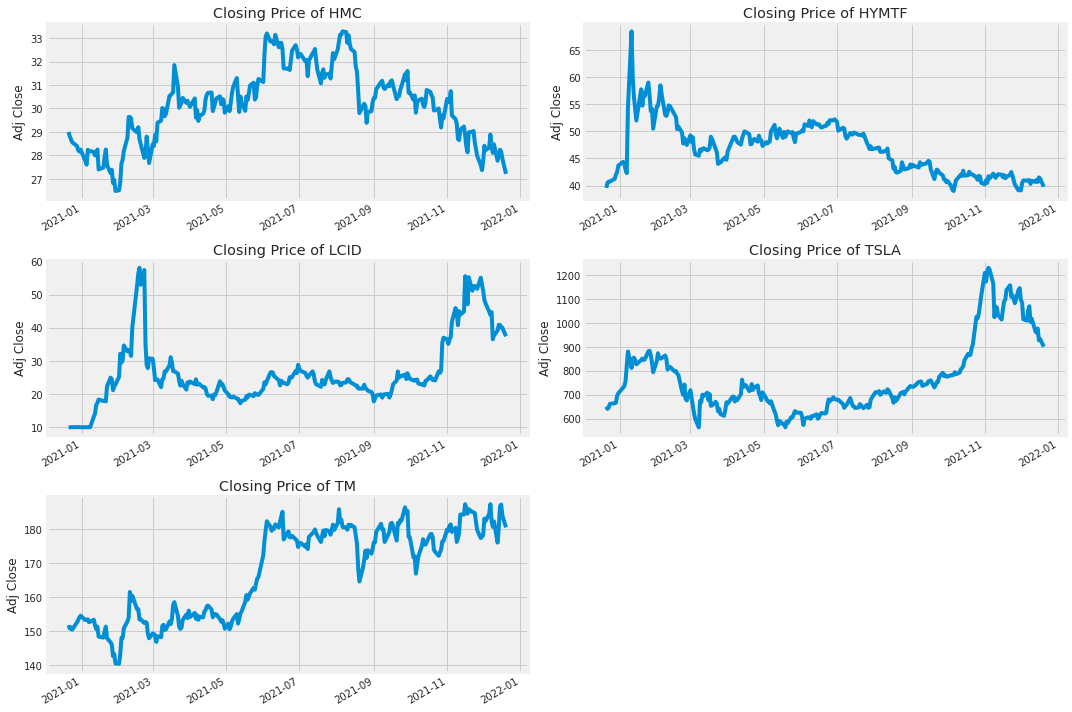

In [12]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

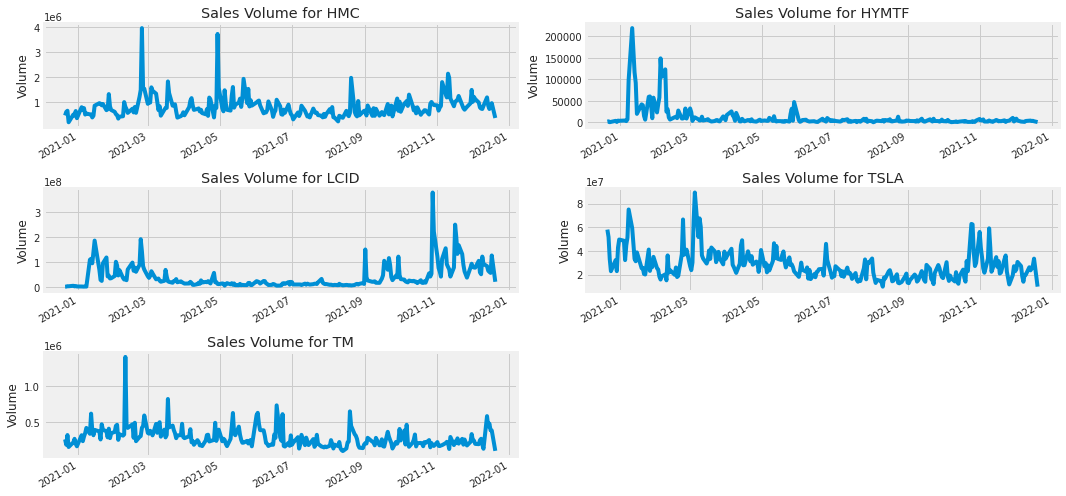

In [13]:
# Transaction volume by company

plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [15]:
#Moving average is a great indicator of buy&sell signals. Let's get the values according to each company.

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

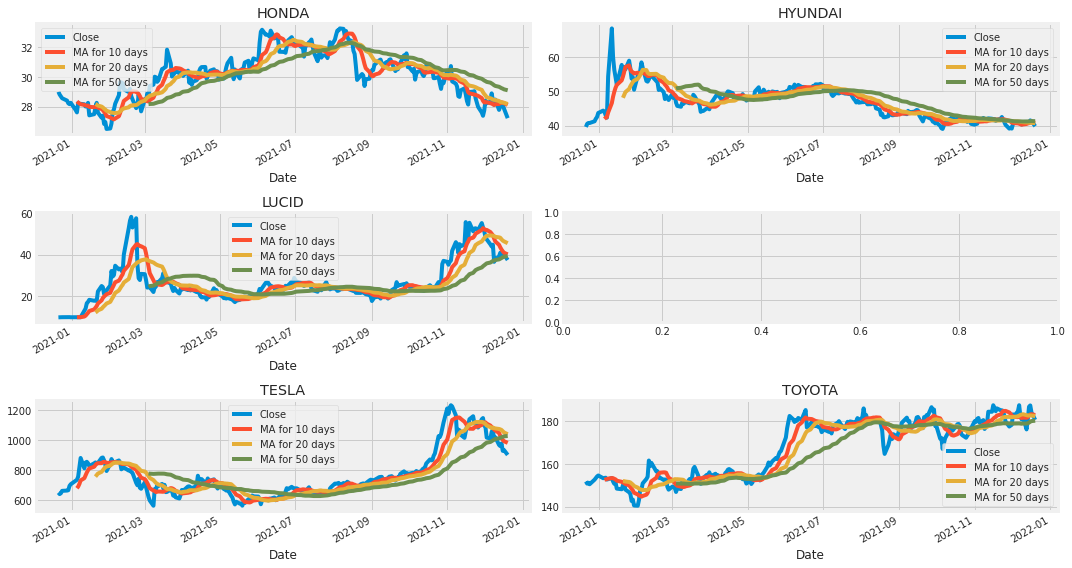

In [17]:
#People are not good at values, let's put them on a beautiful graphs so they can think we do wizardary.

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
[HMC, HYMTF, LCID,TSLA,TM]
HMC[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('HONDA')

HYMTF[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('HYUNDAI')

LCID[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('LUCID')

TSLA[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('TESLA')

TM[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('TOYOTA')

fig.tight_layout()

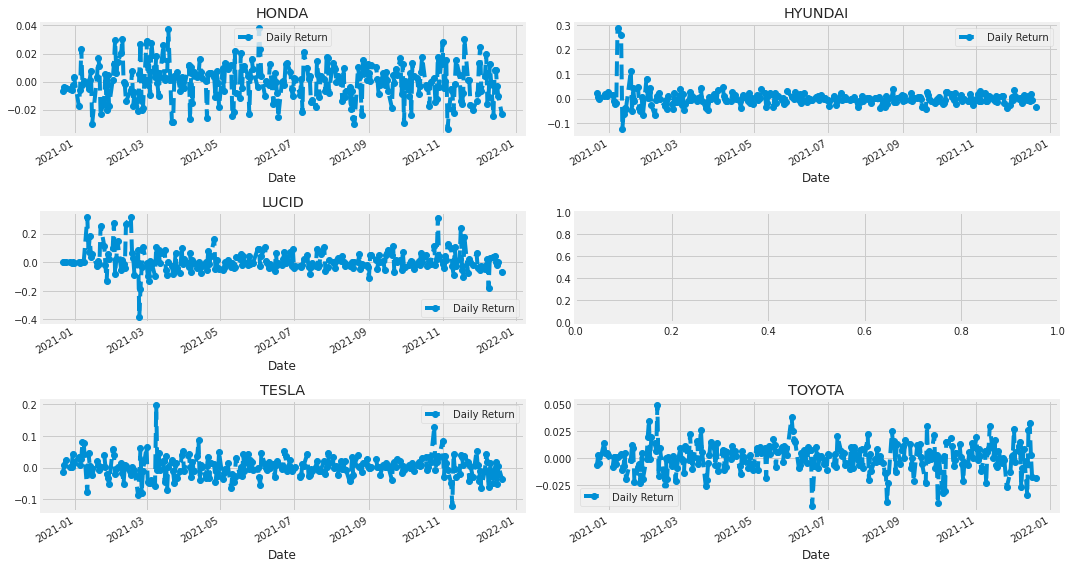

In [23]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
[HMC, HYMTF, LCID,TSLA,TM]
HMC['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('HONDA')

HYMTF['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('HYUNDAI')

LCID['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('LUCID')

TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')


TM['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('TOYOTA')


fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

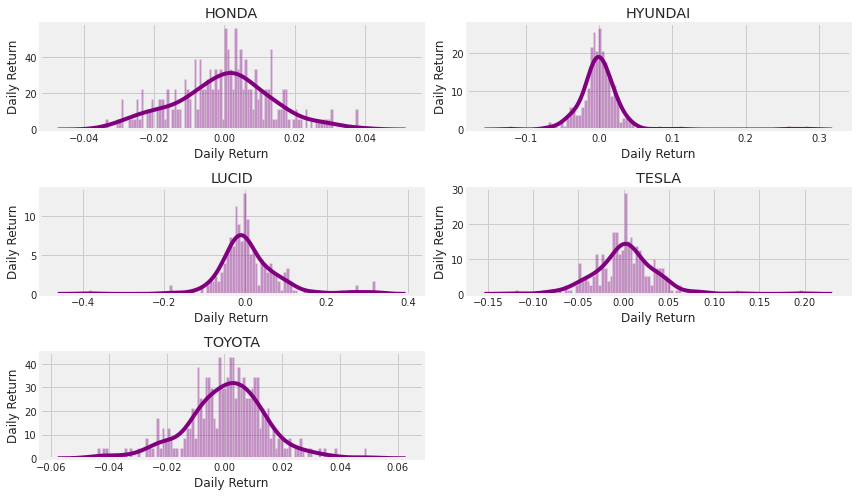

In [24]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

In [25]:
#Let's create a new dataframe that consists of closing values.

closing_df = pd.DataFrame()

for stock in tech_list:   
    
    # Set DataFrame as the Stock Ticker
    info_fetcher = yf.Ticker(stock)
    closing_df[stock] = info_fetcher.history(start=start, end=end)['Close']

closing_df.head()


,HMC,HYMTF,LCID,TSLA,TM
Date,,,,,
2020-12-21,29.000000,39.580002,9.97,649.859985,151.770004
2020-12-22,28.809999,40.500000,10.00,640.340027,150.770004
2020-12-23,28.690001,40.740002,10.03,645.979980,151.160004
2020-12-24,28.559999,40.740002,10.04,661.770020,150.470001
2020-12-28,28.400000,41.240002,10.08,663.690002,152.600006


In [26]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,HMC,HYMTF,LCID,TSLA,TM
Date,,,,,
2020-12-21,NaN,NaN,NaN,NaN,NaN
2020-12-22,-0.006552,0.023244,0.003009,-0.014649,-0.006589
2020-12-23,-0.004165,0.005926,0.003000,0.008808,0.002587
2020-12-24,-0.004531,0.000000,0.000997,0.024444,-0.004565
2020-12-28,-0.005602,0.012273,0.003984,0.002901,0.014156


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


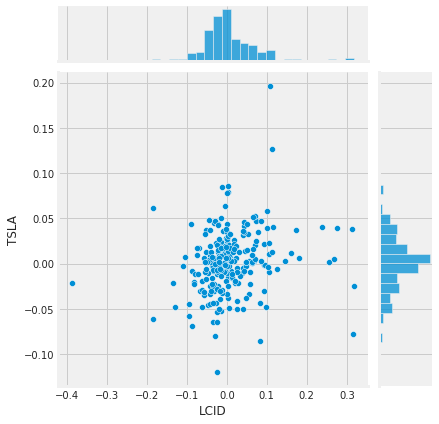

In [29]:
#Scattering the correlation between Lucid and Tesla. Lucid produces fully electric luxury cars with out-of-box designs.
# Since both are new but promising companies, it makes sense to compare them value-wise.
sns.jointplot('LCID', 'TSLA', tech_rets, kind='scatter')


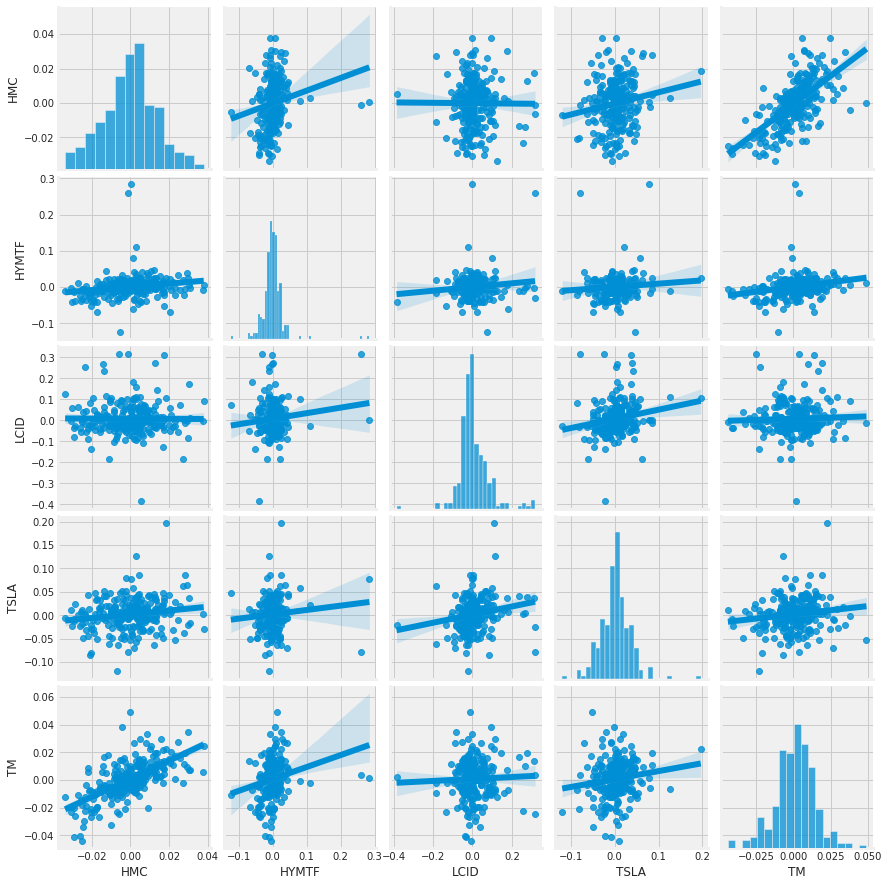

In [30]:
#Let's put all of them on correlation scatter graph.
sns.pairplot(tech_rets, kind='reg')

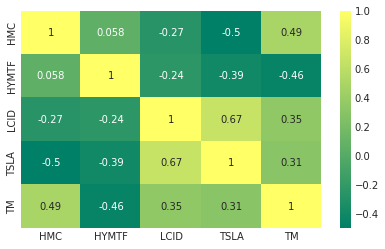

In [31]:
#Correlation heat-map. Tesla has the highest correlation with Lucid. Does it mean anything to you ?

sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

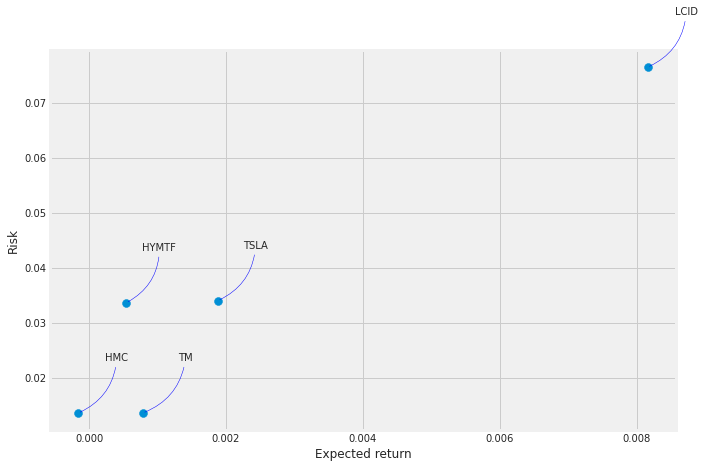

In [32]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
# We will be evaluating risk factors based on standard deviations.

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [33]:
# Get the stock quote

df_tesla = pd.DataFrame()
info_fetcher = yf.Ticker('TSLA')

df_tesla = info_fetcher.history(start='2013-01-01', end=end)

# Show teh data
df_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-02,7.000000,7.090000,6.942000,7.072000,5974000,0,0.0
2013-01-03,7.036000,7.090000,6.950000,6.954000,3710000,0,0.0
2013-01-04,6.960000,6.960000,6.784000,6.880000,3370000,0,0.0
2013-01-07,6.960000,6.960000,6.780000,6.868000,2210000,0,0.0
2013-01-08,6.900000,6.900000,6.622000,6.736000,6420000,0,0.0
...,...,...,...,...,...,...,...
2021-12-14,945.000000,966.409973,930.000000,958.510010,23602100,0,0.0
2021-12-15,953.210022,978.750000,928.250000,975.989990,25056400,0,0.0
2021-12-16,994.500000,994.979980,921.849976,926.919983,27590500,0,0.0


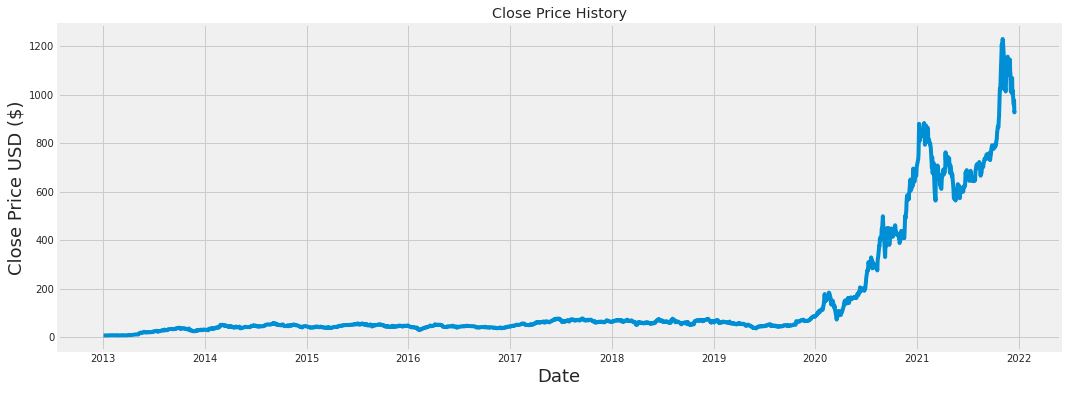

In [124]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_tesla['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [125]:
data = df_tesla.filter(['Close'])

In [126]:
#Scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_tesla.filter(['Close']))
scaled_data

array([[4.00546897e-04],
       [3.04088688e-04],
       [2.43598060e-04],
       ...,
       [7.92435032e-01],
       [7.52323136e-01],
       [7.56941705e-01]])

In [127]:
dataset = df_tesla.filter(['Close']).values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2146

In [128]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([4.00546897e-04, 3.04088688e-04, 2.43598060e-04, 2.33788684e-04,
       1.25886335e-04, 1.19346881e-04, 1.01362896e-04, 0.00000000e+00,
       5.72210966e-05, 1.61853914e-04, 1.94551573e-04, 2.40328138e-04,
       2.63216421e-04, 3.72753926e-04, 5.05179325e-04, 6.67032850e-04,
       6.65398084e-04, 8.37060984e-04, 8.23982076e-04, 7.53682072e-04,
       7.52046917e-04, 8.81202783e-04, 7.89649262e-04, 8.53409813e-04,
       1.02343795e-03, 1.07411920e-03, 1.03488209e-03, 9.00821534e-04,
       8.14172701e-04, 9.05726222e-04, 8.76298095e-04, 6.75207459e-04,
       1.04142154e-03, 9.20440285e-04, 3.67849239e-04, 5.23163310e-04,
       2.40328138e-04, 2.48502748e-04, 3.58039863e-04, 3.13898064e-04,
       2.84469938e-04, 4.36514477e-04, 6.11446909e-04, 7.81475043e-04,
       8.69758642e-04, 9.08995754e-04, 1.01199381e-03, 1.01526334e-03,
       9.92375055e-04, 6.44144567e-04, 3.89102755e-04, 3.66214473e-04,
       3.54769942e-04, 4.97005105e-04, 5.06814481e-04, 6.06542221e-04,
     

In [129]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2086/2086 [==============================] - 82s 38ms/step - loss: 0.0013


In [80]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

56.17300385048954

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


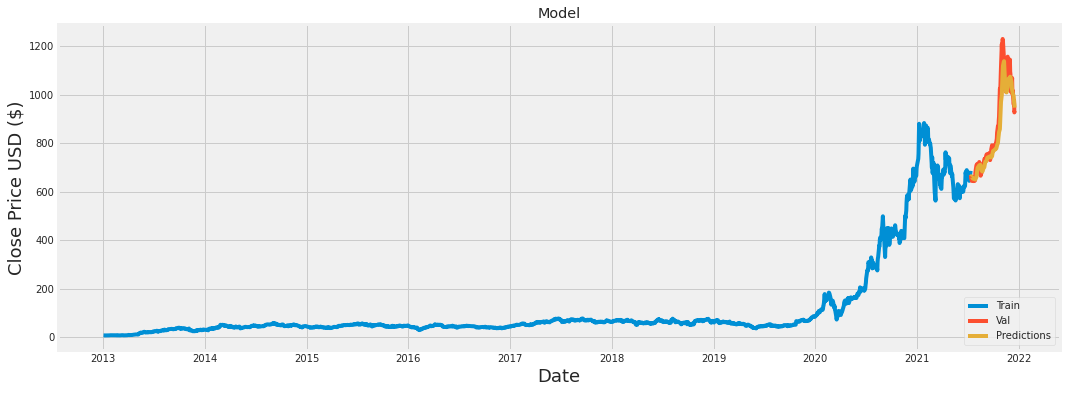

In [83]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [84]:
valid

,Close,Predictions
Date,,
2021-07-13,668.539978,662.112427
2021-07-14,653.380005,663.569092
2021-07-15,650.599976,662.827148
2021-07-16,644.219971,660.733398
2021-07-19,646.219971,657.353516
...,...,...
2021-12-13,966.409973,997.218384
2021-12-14,958.510010,984.450928
2021-12-15,975.989990,970.315002
